# Simple Linear Regrssion

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\bodak\Downloads\NewspaperData.csv")

In [3]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
#selecting relevant columns
df = df[['daily','sunday']]

In [5]:
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [6]:
#data distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 672.0 bytes


In [7]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


<Axes: xlabel='daily', ylabel='Density'>

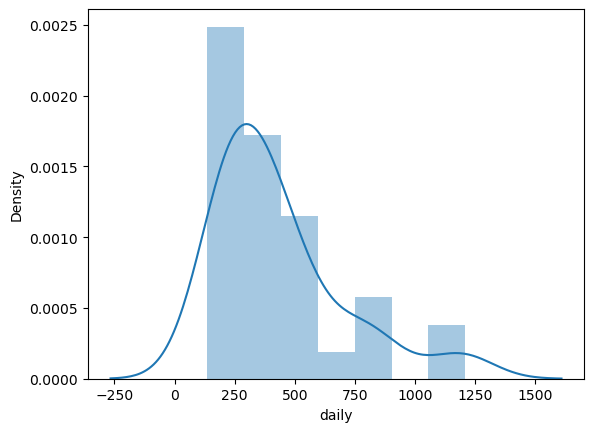

In [8]:
sns.distplot(df['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

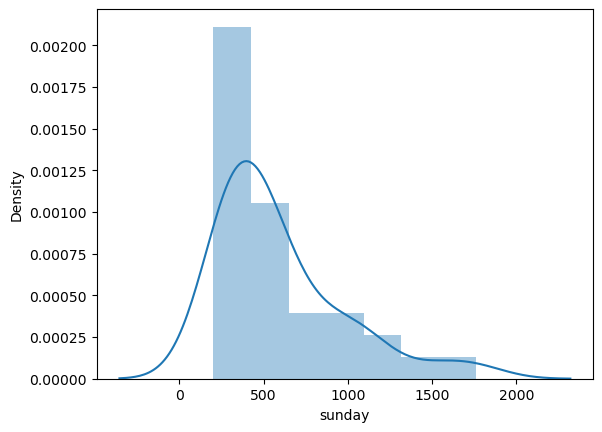

In [9]:
sns.distplot(df['sunday'])

In [10]:
#correlation analysis
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

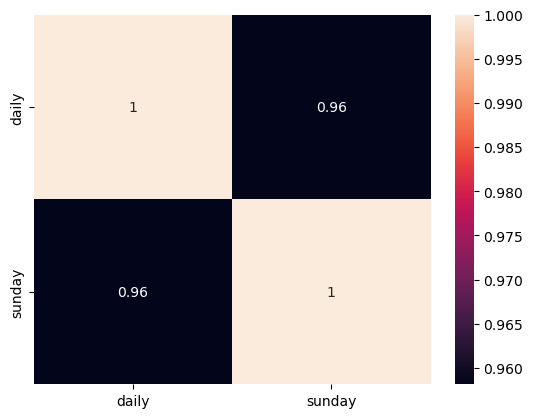

In [11]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='daily', ylabel='sunday'>

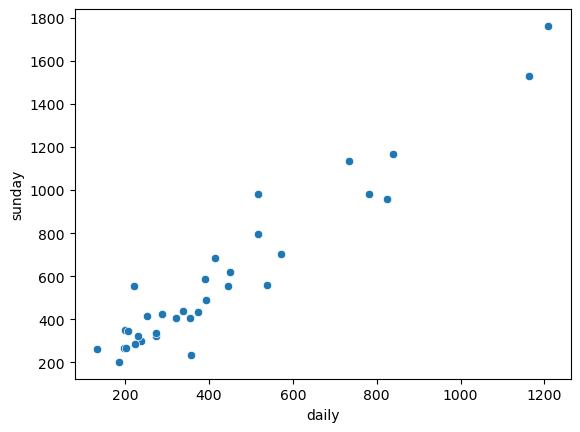

In [12]:
#scatter plot
sns.scatterplot(x = df['daily'],y = df['sunday'])

In [13]:
#import statsmodels

In [14]:
import statsmodels.formula.api as smf

In [15]:
#train the model  

In [16]:
model =  smf.ols('sunday~daily',data=df).fit()

In [17]:
#regression plot

<Axes: xlabel='daily', ylabel='sunday'>

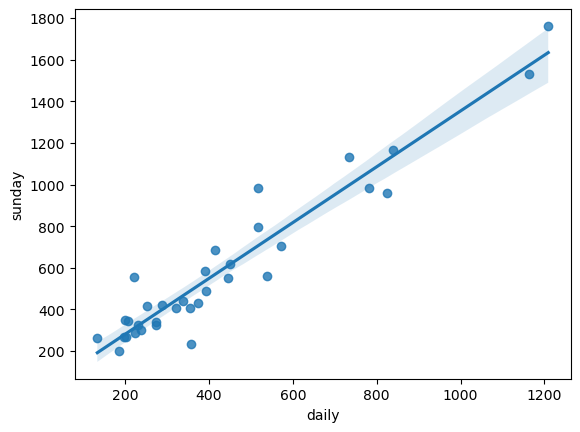

In [18]:
sns.regplot(x = df['daily'],y =df['sunday'])

In [19]:
#model parameters

In [20]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [21]:
#line equation

In [22]:
#y = mx + c
y = (1.33)*300+13.83
y

412.83

In [23]:
#print values for t value and p value

print(model.tvalues,model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [24]:
#r2 value

In [25]:
print(model.rsquared,model.rsquared_adj)

0.9180596895873294 0.9154990548869335


# Prediction for new Data

In [26]:
newdata = pd.Series([200,500,800])

In [27]:
newdata = pd.DataFrame(newdata,columns=['daily'])

In [28]:
newdata

,daily
0,200
1,500
2,800


In [29]:
model.predict(newdata)

0     281.778581
1     683.693009
2    1085.607436
dtype: float64

# 2) Multiple Linear Regression

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [31]:
#Read the data
df = pd.read_csv(r"C:\Users\bodak\Downloads\Cars.csv")

In [32]:
df.head()#MPG Target Column

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [33]:
# description

In [34]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [35]:
#check null values

In [36]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [37]:
#scatter matrix,correlation matrix
#pairplot, pd.plotting.scatter_matrix

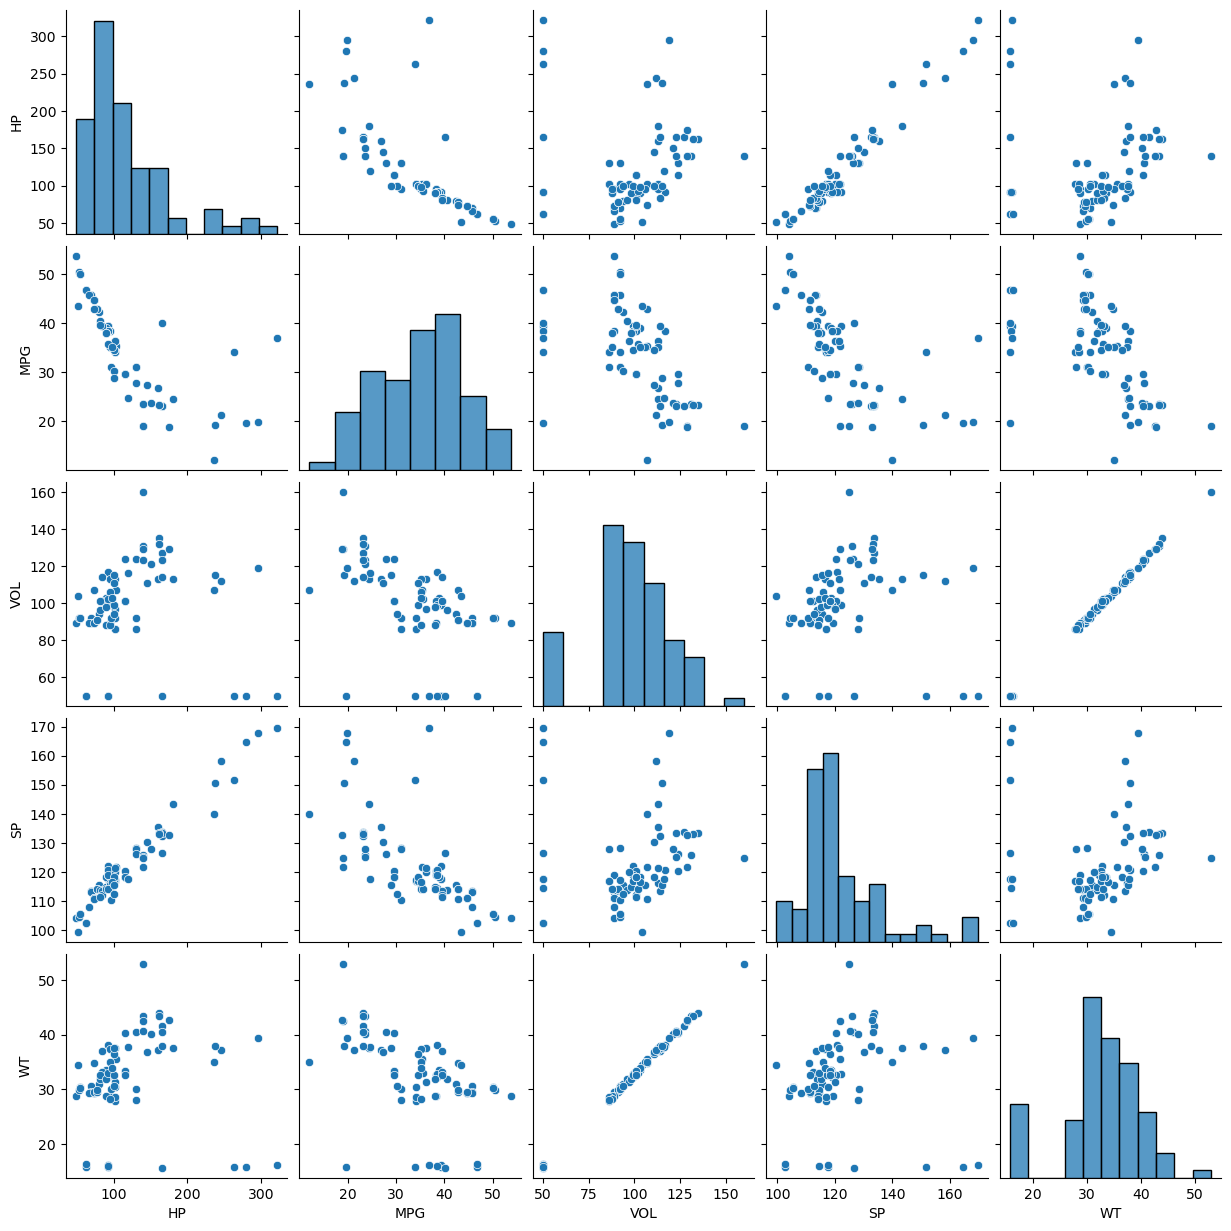

In [38]:
sns.pairplot(df)

In [39]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

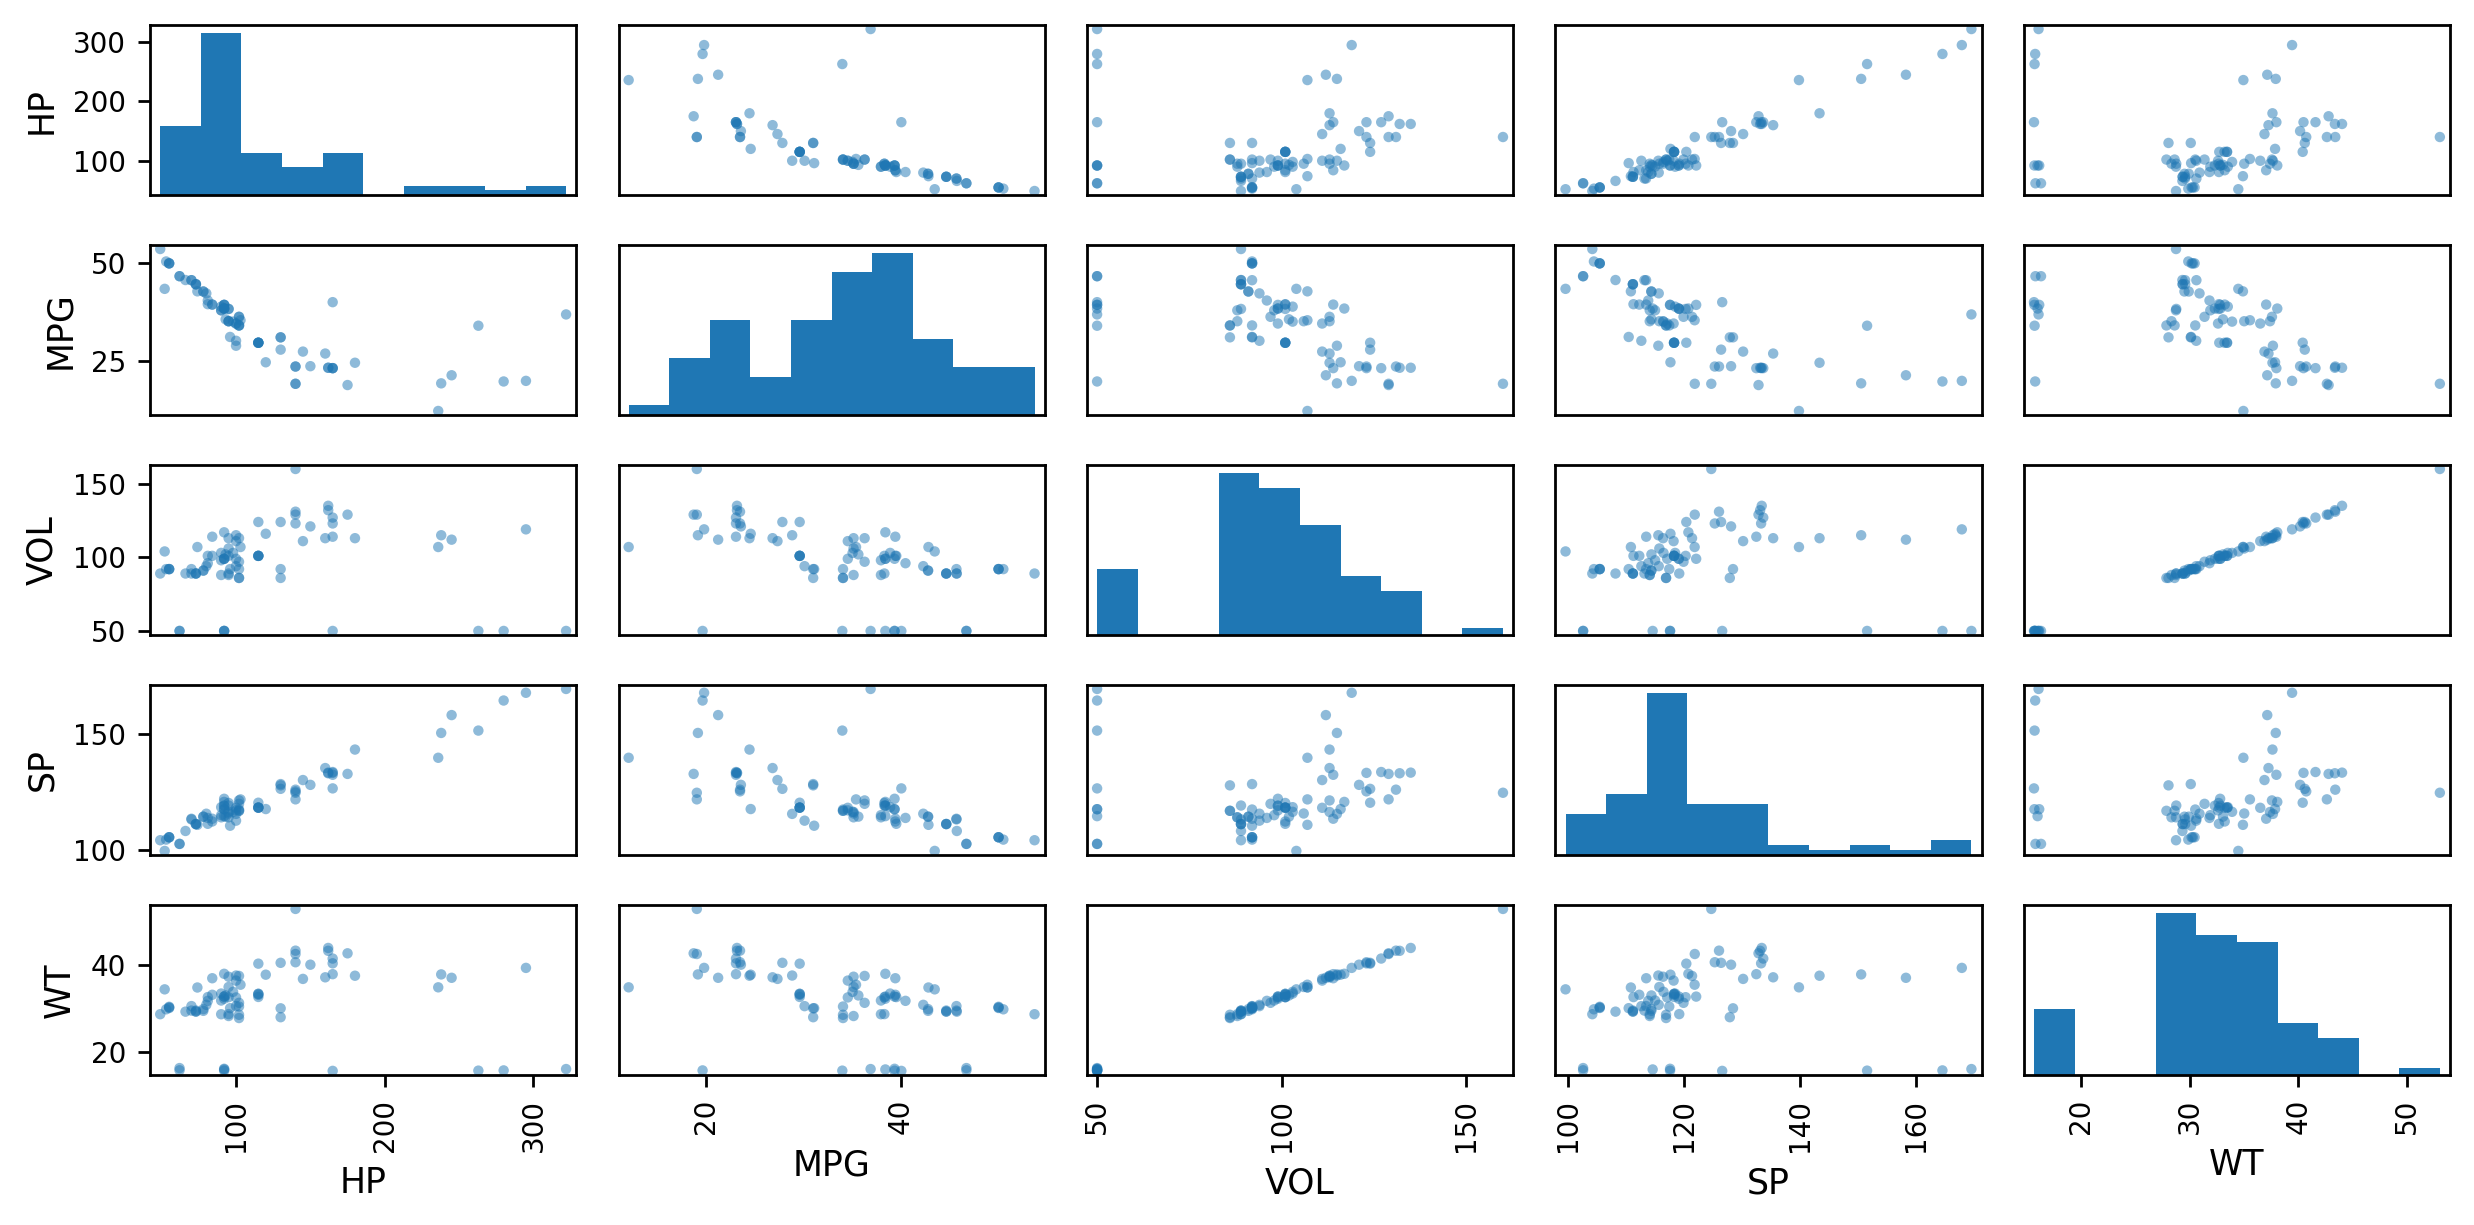

In [40]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()

In [41]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

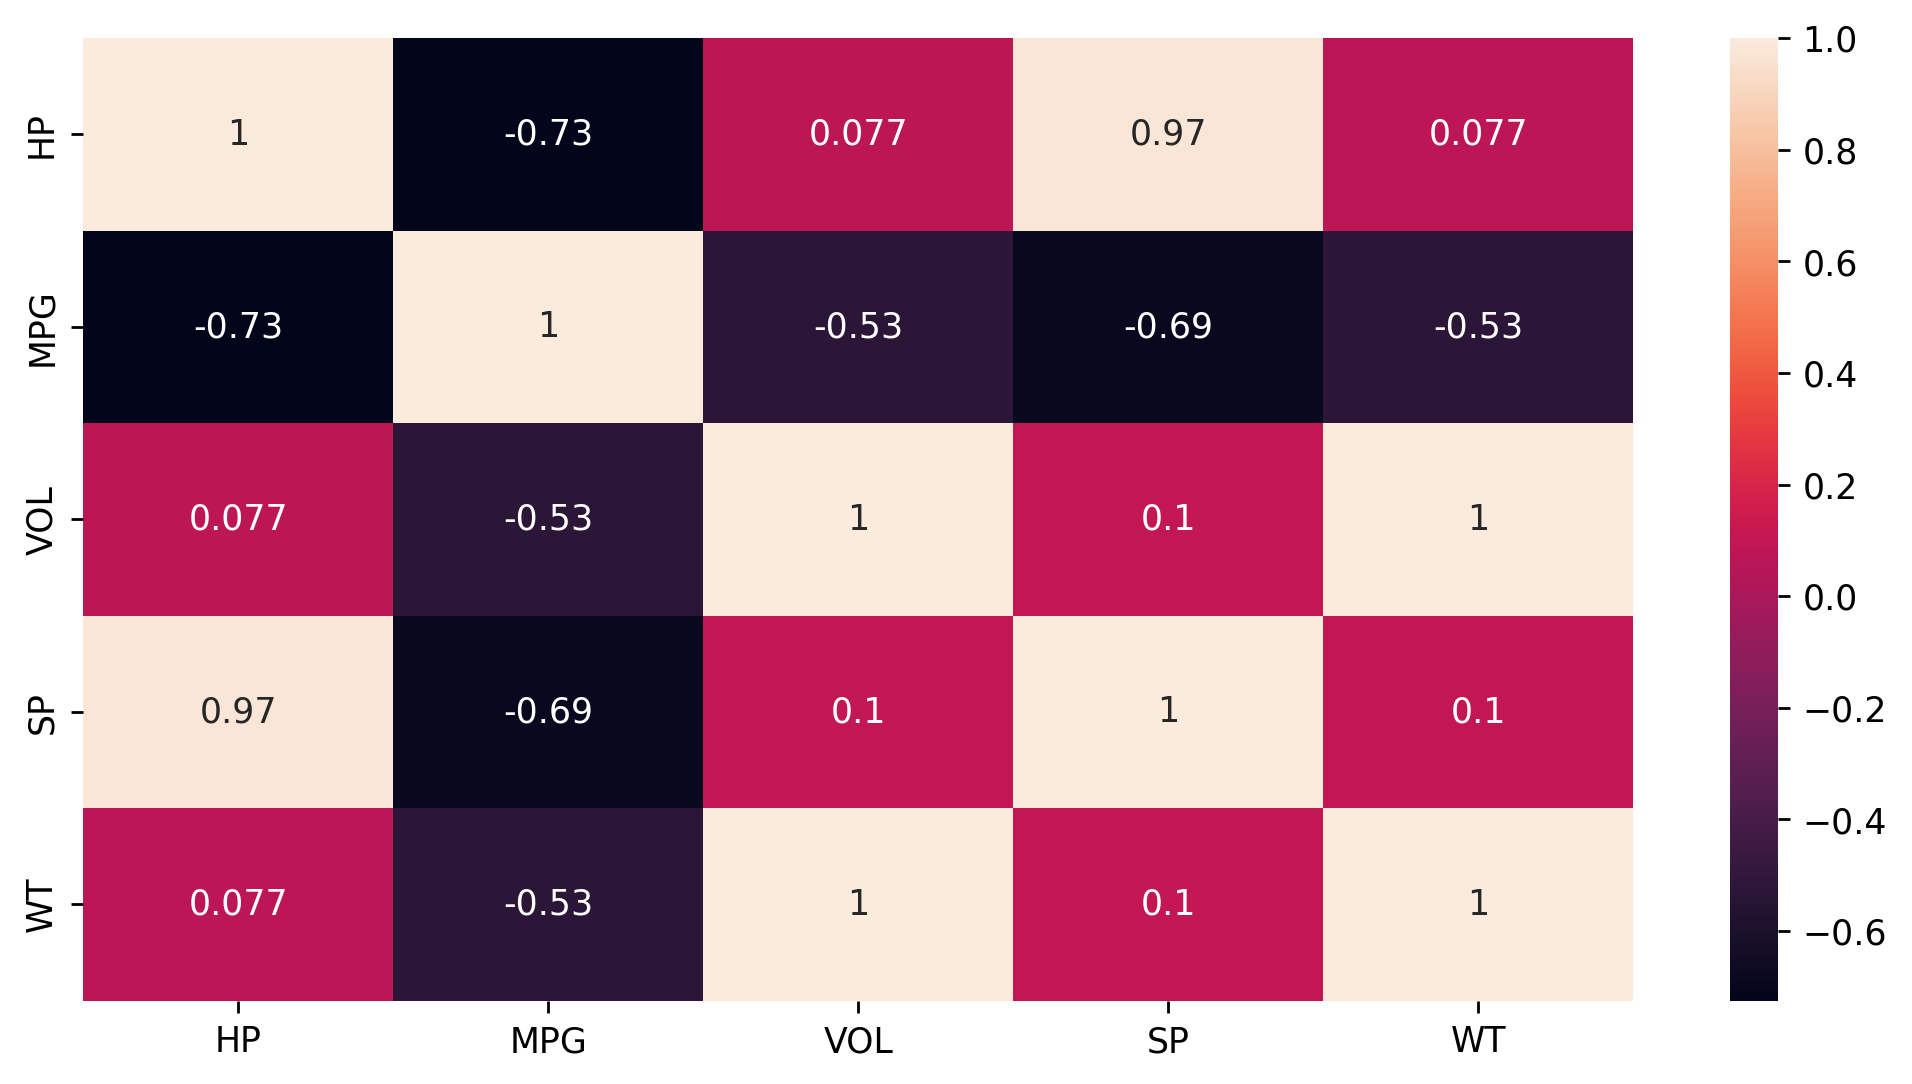

In [42]:
sns.heatmap(df.corr(),annot=True)

# Preparing Model

In [43]:
#Build Model

In [44]:
import statsmodels.formula.api as smf

In [45]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [46]:
model=smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [47]:
#coefficients

In [48]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [49]:
#t and p Value

In [50]:
print('t-values are as follows: ', model.tvalues,'\n','p-values are as follows: ',model.pvalues)

t-values are as follows:  Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 
 p-values are as follows:  Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


In [51]:
#r2 values

In [52]:
print(model.rsquared)
model.rsquared_adj

0.7705372737359844


0.7584602881431415

In [53]:
#model summary

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.54e-23
Time:                        19:20:31   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# simple linear regression models

In [55]:
#MPG and VOL model

In [56]:
vol_model = smf.ols('MPG~VOL',data=df).fit()

In [57]:
vol_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           3.82e-07
Time:                        19:20:31   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#wt model
wt_model = smf.ols('MPG~WT',data=df).fit()

In [59]:
wt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.38e-07
Time:                        19:20:31   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#MPG,WT,VOL

In [61]:
wt_vol_model = smf.ols('MPG~WT+VOL',data=df).fit()

In [62]:
wt_vol_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.43e-06
Time:                        19:20:31   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF

In [63]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [64]:
r_hp = smf.ols('HP~VOL+WT+SP',data=df).fit().rsquared
vif_hp = 1/(1-r_hp)

In [65]:
r_vol = smf.ols('VOL~HP+SP+WT',data=df).fit().rsquared
vif_vol= 1/(1-r_vol)

In [66]:
r_sp = smf.ols('SP~VOL+WT+HP',data=df).fit().rsquared
vif_sp = 1/(1-r_sp)

In [67]:
r_wt = smf.ols('WT~VOL+HP+SP',data=df).fit().rsquared
vif_wt = 1/(1-r_wt)

In [68]:
vif = pd.DataFrame({
    'Features_names': ['HP','VOL','SP','WT'],
    'VIF':[vif_hp,vif_vol,vif_sp,vif_wt]
})

In [69]:
vif

,Features_names,VIF
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


In [70]:
#choose relevant features only

In [71]:
df.drop(columns=['WT'],inplace=True)

In [72]:
df.head()

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264
2,55,50.013401,92,105.461264
3,70,45.696322,92,113.461264
4,53,50.504232,92,104.461264


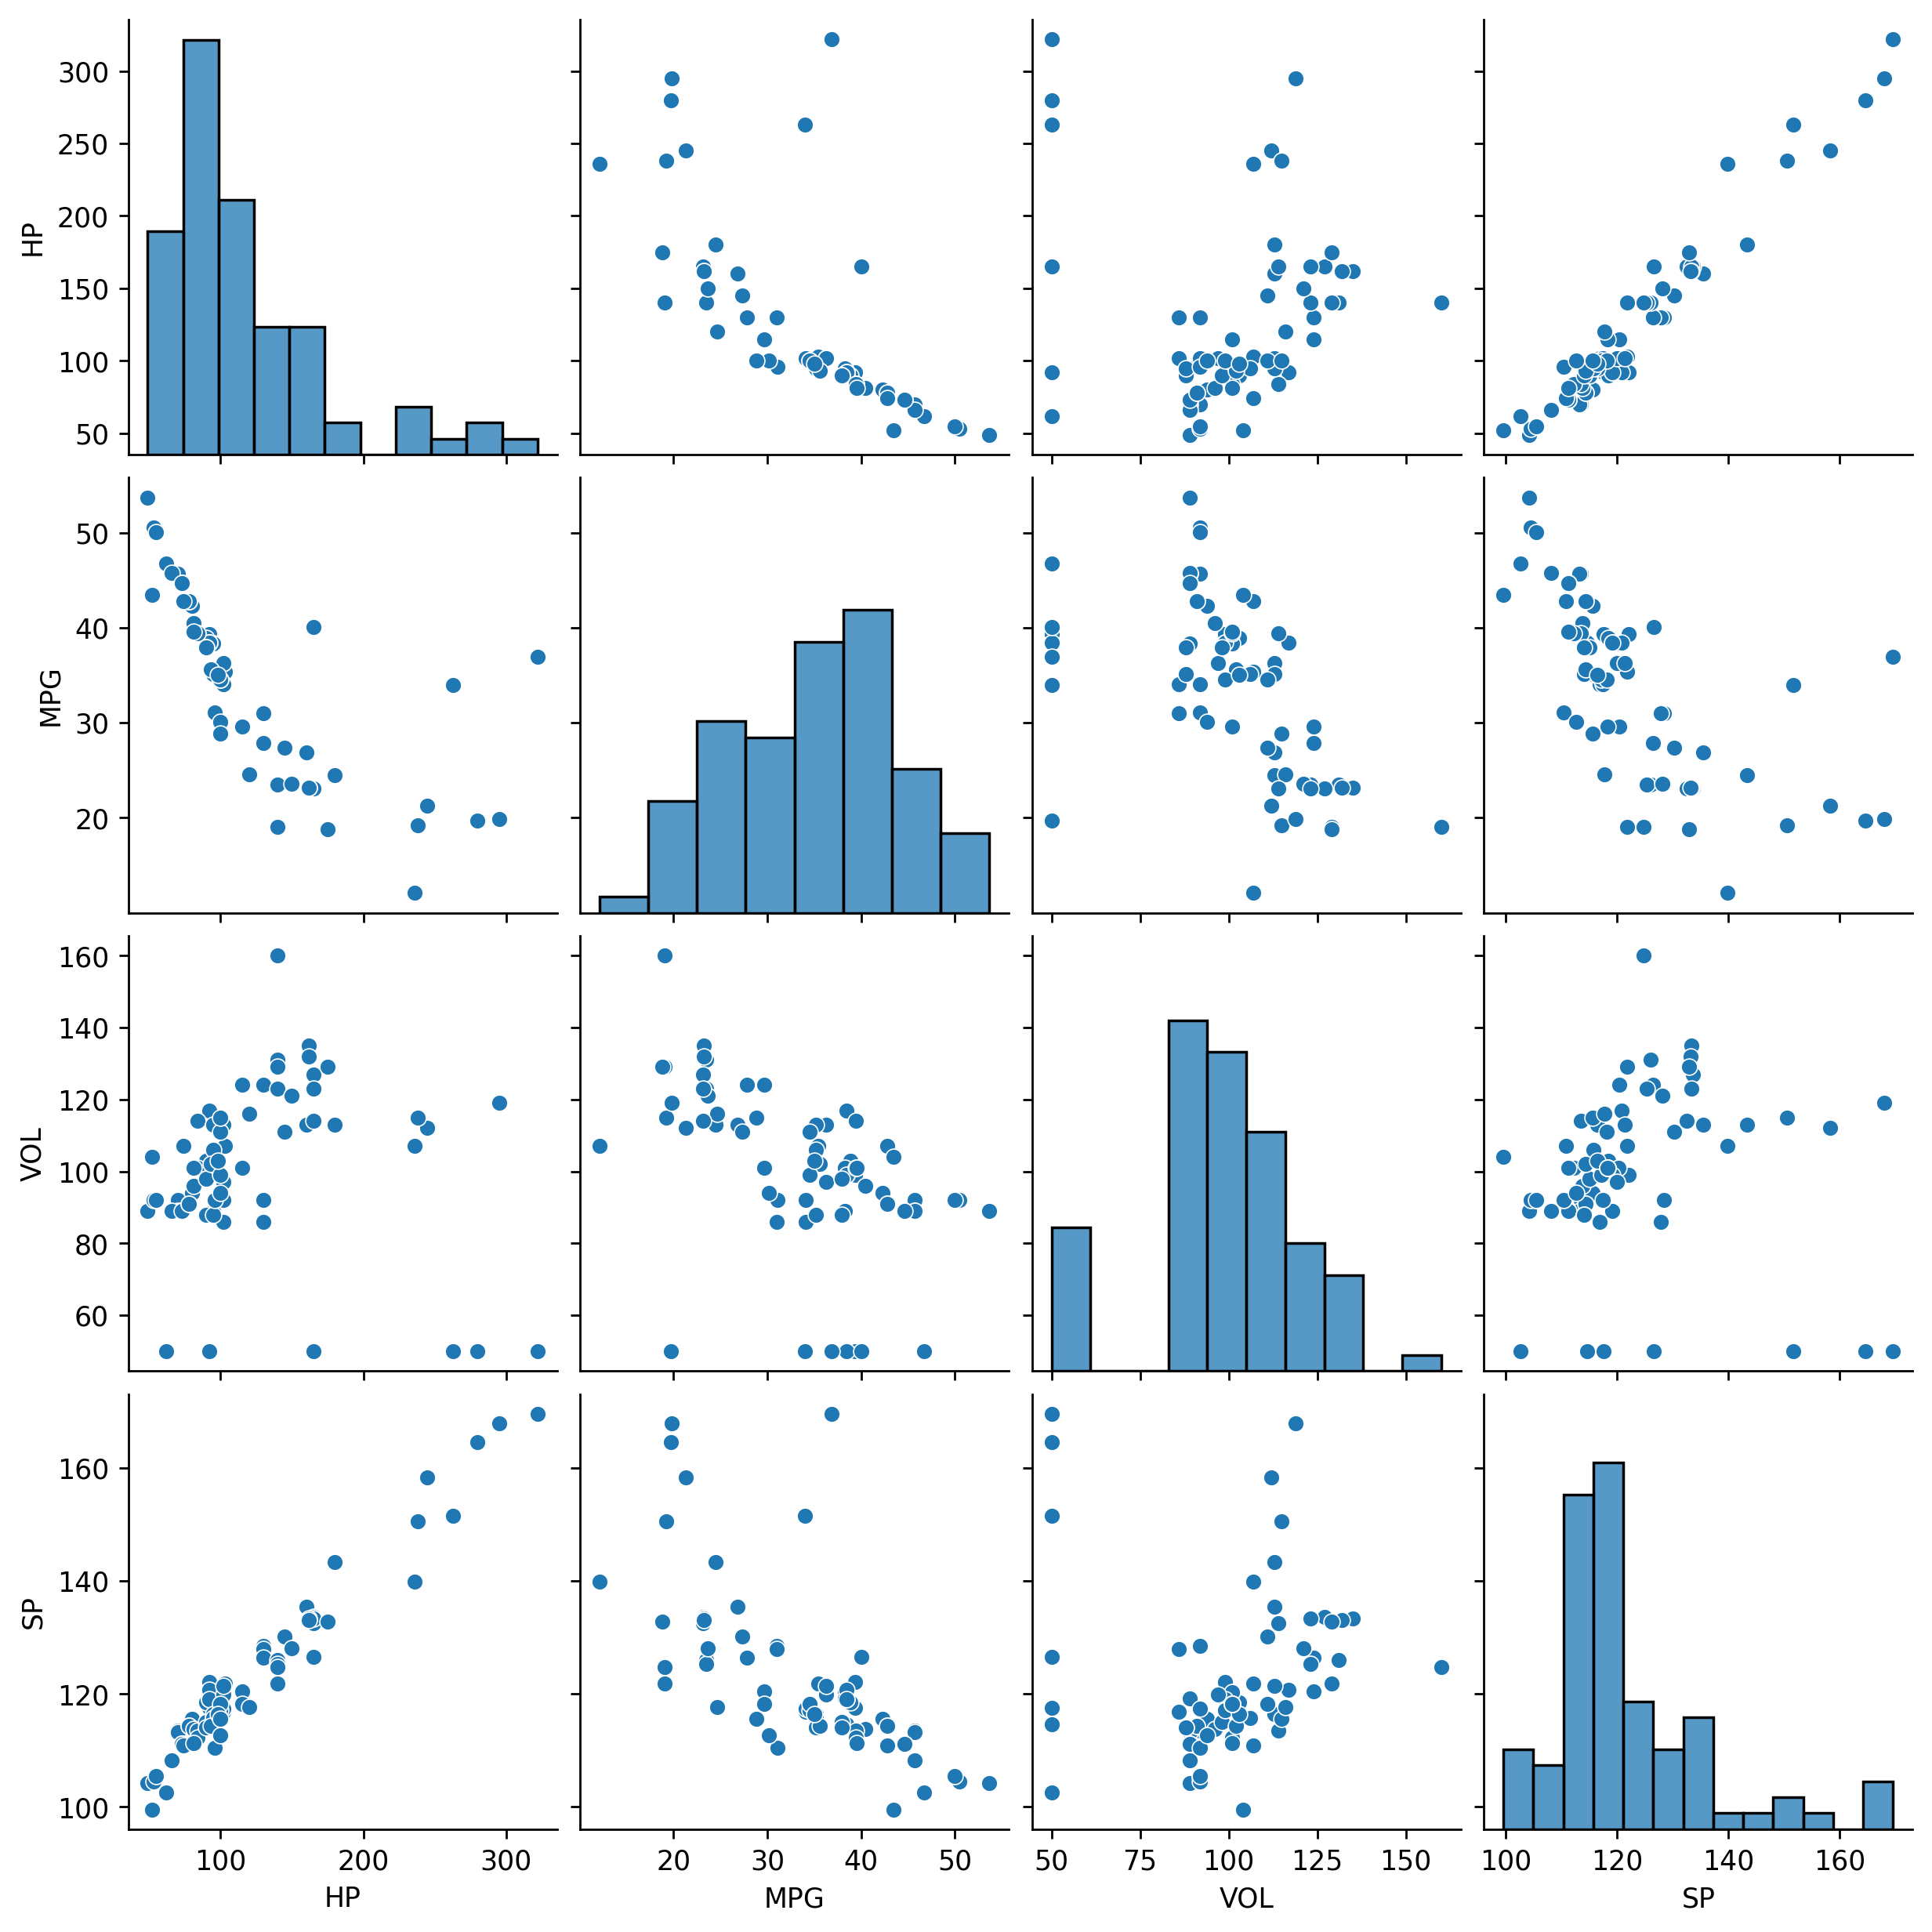

In [73]:
sns.pairplot(df)

In [74]:
f_model = smf.ols('MPG~HP+VOL+SP',data=df).fit()

In [75]:
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           1.56e-24
Time:                        19:20:38   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
#Prediction of New data

In [77]:
newdata = pd.DataFrame({
    'HP':[45,50,60],
    'VOL':[85,95,100],
    'SP':[100,125,163]
})

In [78]:
f_model.predict(newdata)

0    43.547291
1    50.513743
2    62.663496
dtype: float64